# 모자이크 그림 만들기

## 1단계: 그림 읽어 들이기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


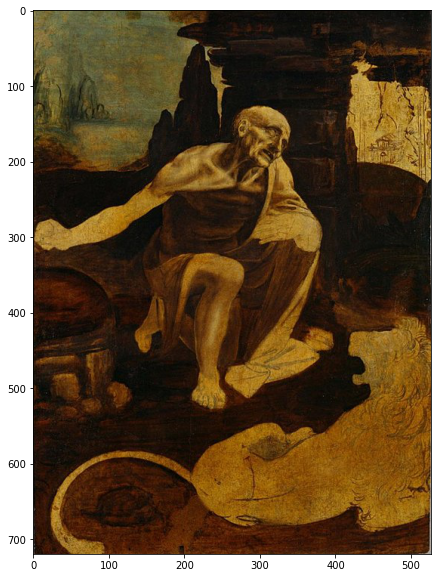

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

#path = "/content/drive/MyDrive/Colab Notebooks/data/Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg"
#path = "/content/drive/MyDrive/Colab Notebooks/data/725px-Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg"
path = "/content/drive/MyDrive/Colab Notebooks/data/527px-Leonardo_da_Vinci,_Saint_Jerome.jpg"
image_pil = Image.open(path)
image_ori = np.array(image_pil)
image_mosaic = copy.deepcopy(image_ori)
 
plt.figure(figsize=(10, 10))
plt.imshow(image_ori, cmap='Greys_r')
plt.show()

In [ ]:
xsize, ysize, colsize = image_ori.shape

In [ ]:
binning=30
xbin = int(xsize/binning)
ybin = int(ysize/binning)
image_ori[:,:,:].min()

0

In [ ]:
for iii in range(0,binning,1):
  for jjj in range(0,binning,1):
    tmp_xrange = [v for v in range(iii*xbin,(iii+1)*xbin)]
    tmp_yrange = [v for v in range(jjj*ybin,(jjj+1)*ybin)]
    tmp_r = image_ori[iii*xbin:(iii+1)*xbin, jjj*ybin:(jjj+1)*ybin,0].mean()
    tmp_g = image_ori[iii*xbin:(iii+1)*xbin, jjj*ybin:(jjj+1)*ybin,1].mean()
    tmp_b = image_ori[iii*xbin:(iii+1)*xbin, jjj*ybin:(jjj+1)*ybin,2].mean()
    image_mosaic[iii*xbin:(iii+1)*xbin, jjj*ybin:(jjj+1)*ybin,0] = tmp_r
    image_mosaic[iii*xbin:(iii+1)*xbin, jjj*ybin:(jjj+1)*ybin,1] = tmp_g
    image_mosaic[iii*xbin:(iii+1)*xbin, jjj*ybin:(jjj+1)*ybin,2] = tmp_b

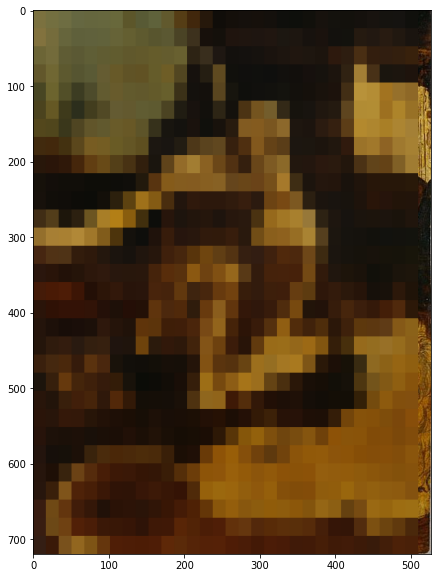

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_mosaic, cmap='Greys_r')
plt.show()

In [ ]:
import random
def shuffle(image_ori, image_copy, binning, xbin, ybin, iteration = 1000):
  sh_x, sh_y, colors = image_ori.shape
  for _ in range(iteration):
    rd_x = random.choice(range(0,binning))
    rd_y = random.choice(range(0,binning))
    col1 = image_ori[rd_x*xbin:(rd_x+1)*xbin,rd_y*ybin:(rd_y+1)*ybin, :]
    rd_x2 = random.choice(range(0,binning))
    rd_y2 = random.choice(range(0,binning))
    col2 = image_ori[rd_x2*xbin:(rd_x2+1)*xbin,rd_y2*ybin:(rd_y2+1)*ybin, :]
    image_copy[rd_x2*xbin:(rd_x2+1)*xbin,rd_y2*ybin:(rd_y2+1)*ybin, :] = col1
    image_copy[rd_x*xbin:(rd_x+1)*xbin,rd_y*ybin:(rd_y+1)*ybin, :] = col2
  return image_copy



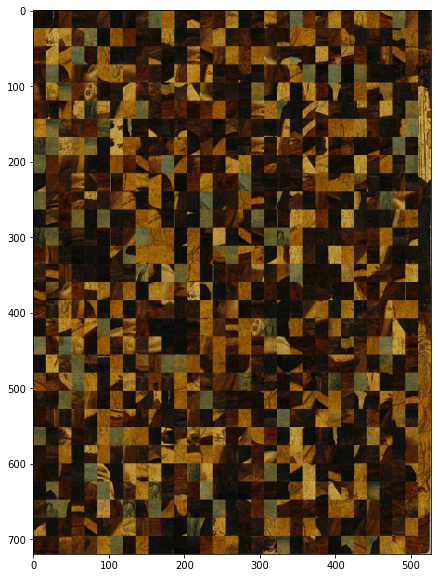

In [ ]:
image_mosaic = shuffle(image_ori, image_mosaic, binning, xbin, ybin, iteration=50000)
plt.figure(figsize=(10,10))
plt.imshow(image_mosaic)
plt.show()

In [ ]:
def white_mosaic(image_copy, binning, xbin, ybin, iteration = 1000):
  for _ in range(iteration):
    rd_x = random.choice(range(0,binning))
    rd_y = random.choice(range(0,binning))
    image_copy[rd_x*xbin:(rd_x+1)*xbin,rd_y*ybin:(rd_y+1)*ybin, :] = 255
  return image_copy

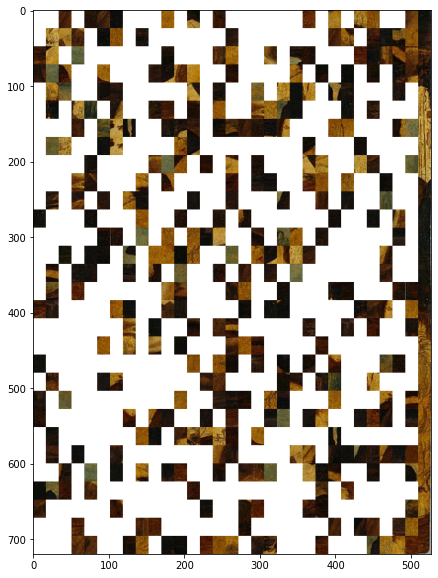

In [ ]:
image_mosaic = white_mosaic(image_mosaic, 
                            binning, xbin, ybin, iteration=binning*binning-30)
plt.figure(figsize=(10,10))
plt.imshow(image_mosaic)
plt.show()